In [3]:
# Install yfinance if not already installed
!pip install yfinance --quiet

# Import necessary libraries
import yfinance as yf
import pandas as pd

# Download Tesla stock data using yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
# Install required libraries for web scraping
!pip install requests beautifulsoup4 --quiet

import requests
from bs4 import BeautifulSoup

# Get Tesla revenue data from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Parse the HTML
soup = BeautifulSoup(html_data, "html.parser")

# Find the revenue table
tables = soup.find_all("table")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Display the last five rows
tesla_revenue.tail()


,Date,Revenue


In [5]:
# Download GameStop stock data using yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


In [6]:
# Get GameStop revenue data from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Find revenue table
tables = soup.find_all("table")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Display the last five rows
gme_revenue.tail()


,Date,Revenue


In [7]:
import matplotlib.pyplot as plt

# Function to plot stock and revenue data
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], 'b-')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_title(title)

    # Create a second y-axis
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), 'r-')
    ax2.set_ylabel('Revenue ($B)', color='r')
    ax2.tick_params('y', colors='r')

    plt.show()

# Call function for Tesla
make_graph(tesla_data, tesla_revenue, 'TSLA', 'Tesla: Stock Price vs Revenue')


ModuleNotFoundError: No module named 'matplotlib'

In [8]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 145.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 143.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 121.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


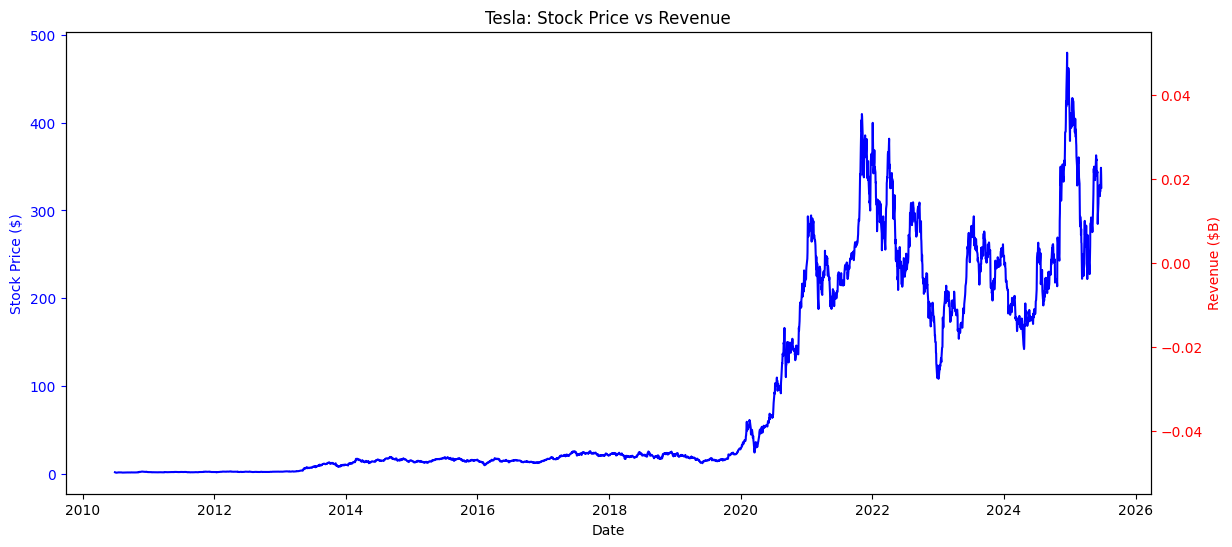

In [9]:
import matplotlib.pyplot as plt

# Function to plot stock and revenue data
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], 'b-')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_title(title)

    # Create a second y-axis
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), 'r-')
    ax2.set_ylabel('Revenue ($B)', color='r')
    ax2.tick_params('y', colors='r')

    plt.show()

# Call function for Tesla
make_graph(tesla_data, tesla_revenue, 'TSLA', 'Tesla: Stock Price vs Revenue')


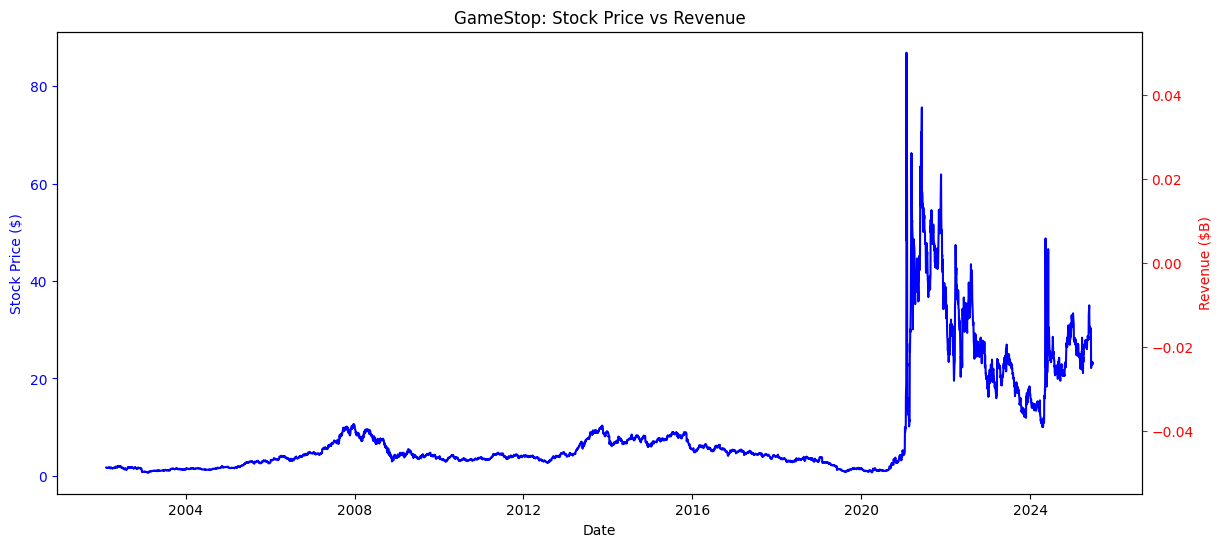

In [10]:
# Call function for GameStop
make_graph(gme_data, gme_revenue, 'GME', 'GameStop: Stock Price vs Revenue')
